In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
df=pd.read_csv(r'C:\Users\Hp\Desktop\Projects\TV Sales\advertising(1).csv')

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.drop(columns=['Radio','Newspaper'],inplace=True,axis=1)

In [6]:
df.shape

(200, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [9]:
X = df.TV
y = df.Sales

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

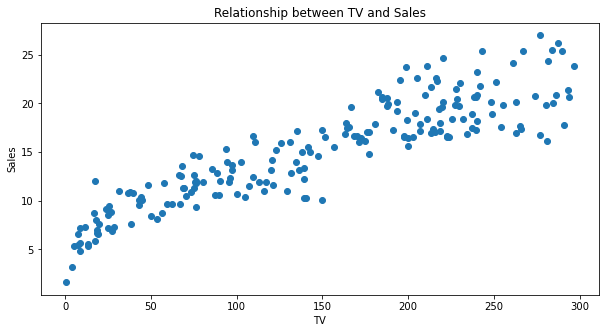

In [11]:
plt.figure(figsize=(10,5))

plt.scatter(X,y)

plt.title('Relationship between TV and Sales')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

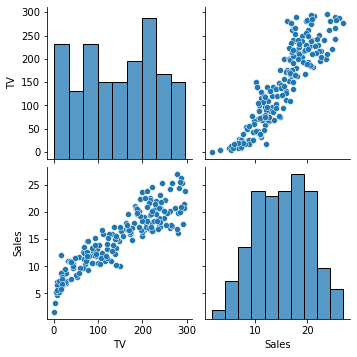

In [12]:
sns.pairplot(df)

In [13]:
print(X.shape)
print(y.shape)

(200,)
(200,)


In [14]:
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [15]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [16]:
X = np.array(X)
X = np.reshape(X,(-1,1))


In [17]:
y = np.array(y)
y = np.reshape(y,(-1,1))

In [18]:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


## Train-Test-Split

In [20]:
from sklearn.model_selection import train_test_split

# Split X and y into training and test data sets with test_size=0.3 and random_state=42

X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(140, 1)
(60, 1)
(60, 1)


In [22]:
from sklearn.linear_model import LinearRegression as lir


# Instantiate the linear regression object lm
lm = lir()
# Fit and train the model using training data sets
lm.fit(X_train,X_test)
# Predict on the test data
y_pred_test = lm.predict(y_train)

In [23]:
# Compute model slope and intercept
print('Estimated model slope, a: {}'.format(lm.coef_))
print('Estimated model intercept, b: {}'.format(lm.intercept_))

Estimated model slope, a: [[0.05483488]]
Estimated model intercept, b: [7.20655455]


In [26]:
y = 0.05483488 * X + 7.20655455


In [29]:
df.TV.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [30]:
pred_x = lm.predict(X)
pred_x[:5]

array([[19.82406131],
       [ 9.64670688],
       [ 8.14971455],
       [15.51403944],
       [17.12070154]])

In [31]:
from sklearn.metrics import mean_squared_error as mse


# Calculate and print Root Mean Square Error(RMSE)
mse = mse(y_test,y_pred_test)
rmse = np.sqrt(mse)

print(f'RMSE value:: {rmse}')

RMSE value:: 2.2758570698017597


In [32]:
from sklearn.metrics import r2_score


# Calculate and print r2_score
r2 = r2_score(y_test,y_pred_test)
print(f'R2 Score value:: {r2 }')

R2 Score value:: 0.814855389208679


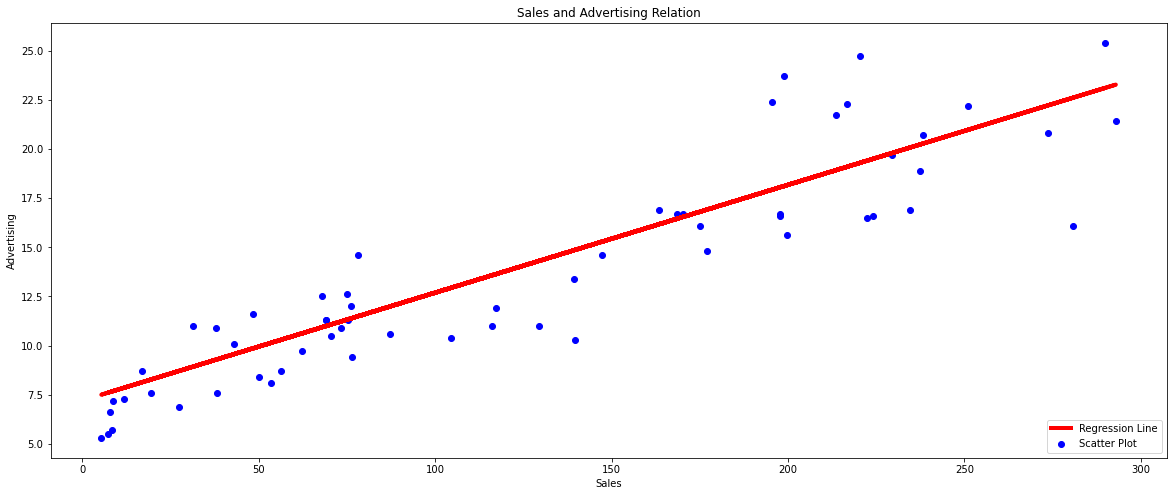

In [33]:

plt.figure(figsize=(20,8))
plt.scatter(y_train,y_test,color='blue',label='Scatter Plot')
plt.plot(y_train,y_pred_test,color='red',linewidth=4,label='Regression Line')

plt.legend(loc=4)
plt.title('Sales and Advertising Relation')
plt.xlabel('Sales')
plt.ylabel('Advertising')

plt.show()

In [34]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((140, 1), (140, 1), (60, 1), (60, 1))

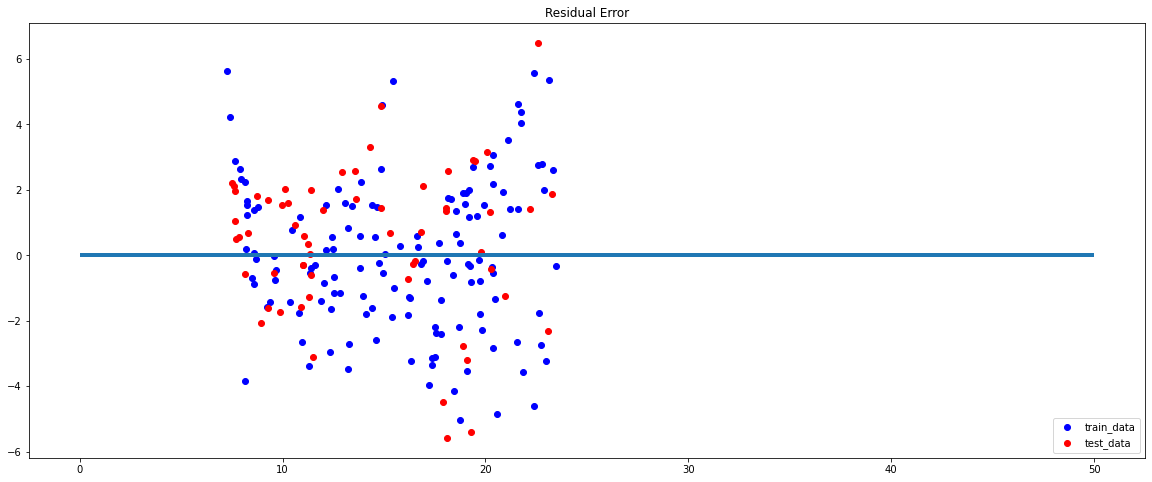

In [35]:

plt.figure(figsize=(20,8))
plt.scatter(lm.predict(X_train),lm.predict(X_train) - X_test,color='blue',label='train_data')
plt.scatter(lm.predict(y_train),lm.predict(y_train) - y_test,color='red',label='test_data')

plt.hlines(xmin=0,xmax=50,y=0,linewidth=4)
plt.legend(loc=4)
plt.title('Residual Error')

plt.show()

In [36]:
print(f'Training set score:: {lm.score(X_train,X_test)}')
print(f'Test set score:: {lm.score(y_train,y_test)}')

Training set score:: 0.799626928219267
Test set score:: 0.814855389208679


In [37]:
import pickle
pickle.dump(lm,open('model.pickle','wb'))